# Checkerboard pattern generation

- Alternates blacks and whites

for x, y indexing the checkerboard

00 | 01
<br>
10 | 11

easiest way to do this will be `(-1)^(x + y)`.
It's called **Toggling**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Trigonometric method

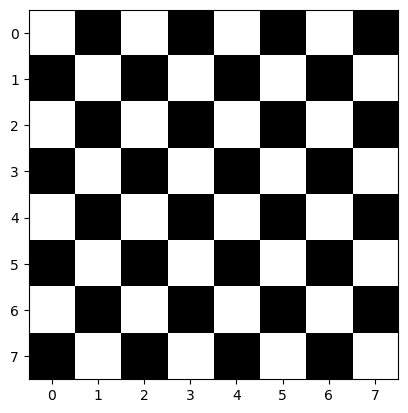

In [2]:
img = np.zeros((8, 8))
m, n = img.shape
for i in range(0, m):
    for j in range(0, n):
        img[i, j] = (-1) ** (i + j)
        
plt.imshow(img, cmap='gray')

Modulo method

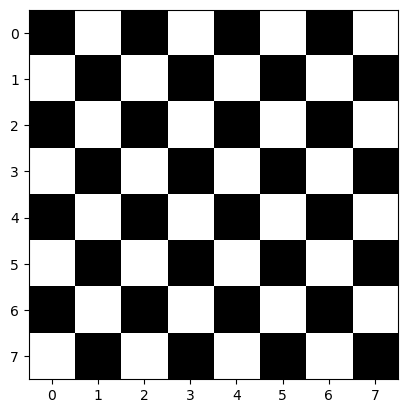

In [3]:
img = np.zeros((8, 8))
m, n = img.shape
for i in range(0, m):
    for j in range(0, n):
        img[i, j] = (i + j)%2
        
plt.imshow(img, cmap='gray')

Changing the + to - in the modulo

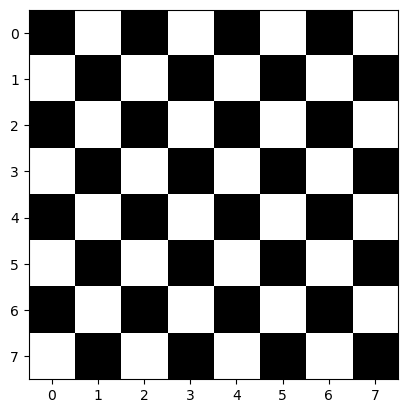

In [4]:
img = np.zeros((8, 8))
m, n = img.shape
for i in range(0, m):
    for j in range(0, n):
        img[i, j] = (i - j)%2
        
plt.imshow(img, cmap='gray')

# Task 1: What are the other ways to generate this pattern?

- Couple of other methods, but they indirectly used the above methods anyway.

# Task 2: What are the logical operations we can perform on the img and img's inverse?

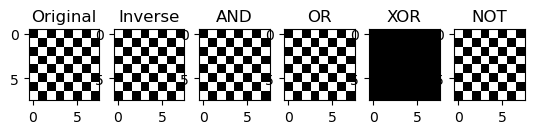

In [8]:
img = np.zeros((8, 8))
imgInv = np.zeros((8, 8))
m, n = img.shape
for i in range(0, m):
    for j in range(0, n):
        img[i, j] = (i + j)%2
        imgInv[i, j] = (i - j)%2

# Perform logical operations
and_op =np.logical_and(img, imgInv)
or_op = np.logical_or(img, imgInv)
xor_op = np.logical_xor(img, imgInv)
not_op = np.logical_not(img, imgInv)  # Inverting the original checkerboard

# Plot the results
plt.subplot(1, 6, 1), plt.imshow(img, cmap='gray'), plt.title('Original')
plt.subplot(1, 6, 2), plt.imshow(imgInv, cmap='gray'), plt.title('Inverse')
plt.subplot(1, 6, 3), plt.imshow(and_op, cmap='gray'), plt.title('AND')
plt.subplot(1, 6, 4), plt.imshow(or_op, cmap='gray'), plt.title('OR')
plt.subplot(1, 6, 5), plt.imshow(xor_op, cmap='gray'), plt.title('XOR')
plt.subplot(1, 6, 6), plt.imshow(not_op, cmap='gray'), plt.title('NOT')

plt.show()

# Task 3: Plot 1 row of the checkerboard pattern.

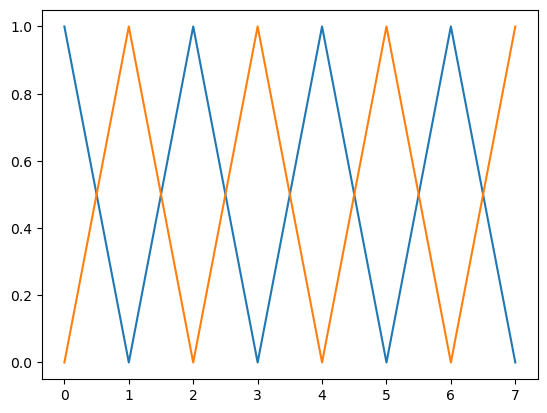

In [7]:
# Task 3 aka the profile of the image
plt.plot(img[3])
plt.plot(img[4])

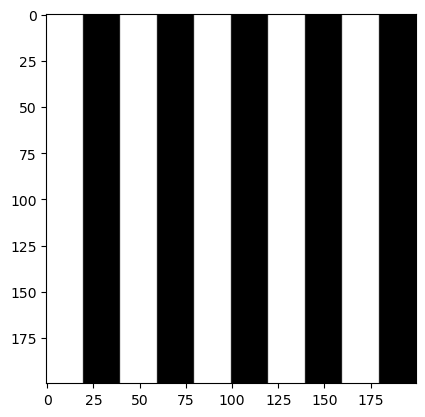

In [31]:
# Pattern generation of white and black stripes
img = np.zeros((200, 200))
m, n = img.shape

stripe_width = 20

for start in range(0, n, 2 * stripe_width):
    img[:, start:start + stripe_width] = 1
        
plt.imshow(img, cmap='gray')

# Compression in t-D is Expansion in f-D

- Test pattern with closely packed white spots in a black image ( A comb function)

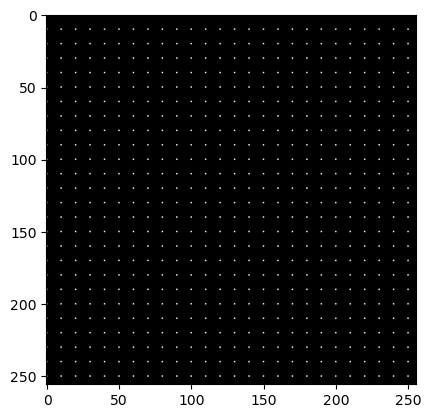

In [32]:
img = np.zeros((256, 256))
img[0:256:10, 0:256:10]=255
plt.imshow(img, cmap='gray')

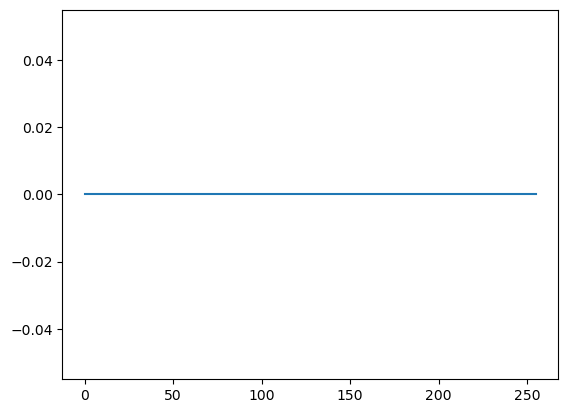

In [33]:
plt.plot(img[128])

### Fourier Transforms
- The FT of a signal is called Spectrum, a complex number.
- It gives us the mangnitude and phase

Now how will the plot of the comb fn's FT's magnitude look like?

The built-in function to do Fourier Transform in py? `np.fft.fft2()`

(<Axes: >, <matplotlib.image.AxesImage at 0x753681579f70>)

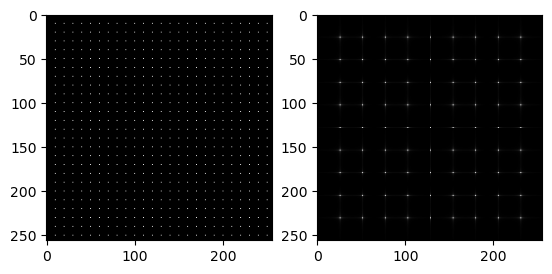

In [34]:
# Generate the image
img = np.zeros((256, 256))
img[0:256:10, 0:256:10]=255 ### INCREASING THIS SPACE WILL DECREASE THE SPACE IN THE FREQUENCY DOMAIN

# Obtain the FT of the input image. A movement from spatial domain to frequency domain
imgFT = np.fft.fft2(img)
# print(imgFT.dtype) # complex128
imgFT = np.fft.fftshift(imgFT)

plt.subplot(1, 2, 1), plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(np.abs(imgFT), cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x7536805da8a0>)

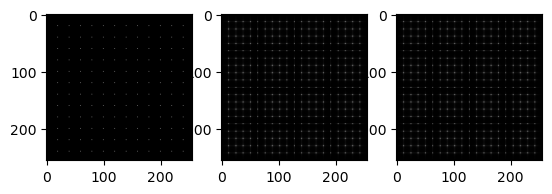

In [35]:
# Generate the image
img = np.zeros((256, 256))
img[0:256:20, 0:256:20]=255 ### INCREASING THIS SPACE WILL DECREASE THE SPACE IN THE FREQUENCY DOMAIN

# Obtain the FT of the input image. A movement from spatial domain to frequency domain
imgFT = np.fft.fft2(img)
# print(imgFT.dtype) # complex128
imgSHIFT = np.fft.fftshift(imgFT)

plt.subplot(1, 3, 1), plt.imshow(img, cmap='gray')
plt.subplot(1, 3, 2), plt.imshow(np.abs(imgFT), cmap='gray')
plt.subplot(1, 3, 3), plt.imshow(np.abs(imgSHIFT), cmap='gray')

# 2D Sinusoidal grating pattern

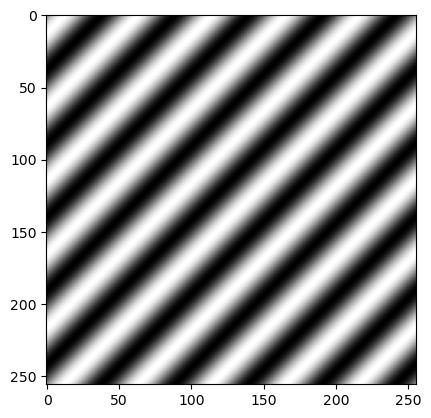

In [36]:
x = y = np.linspace(-128, 128, 256)
X, Y = np.meshgrid(x, y)
fx, fy = 5, 5
img_sin = np.sin(2*np.pi*(fx*X+fy*Y))
plt.imshow(img_sin, cmap='gray')

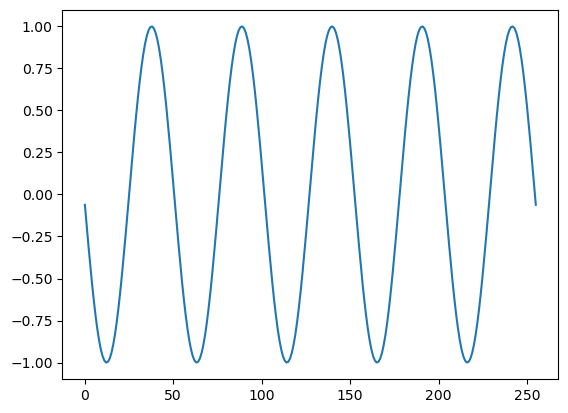

In [37]:
plt.plot(img_sin[128])

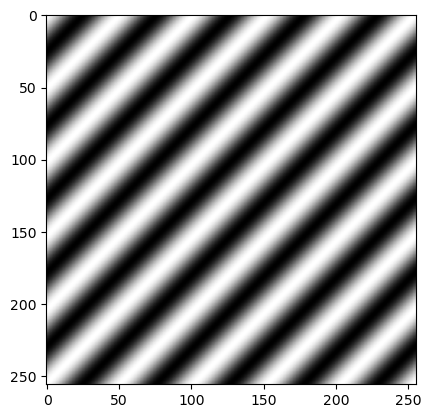

In [38]:
x = y = np.linspace(-128, 128, 256)
X, Y = np.meshgrid(x, y)
fx, fy = 5, 5
img_cos = np.cos(2*np.pi*(fx*X+fy*Y))
plt.imshow(img_cos, cmap='gray')

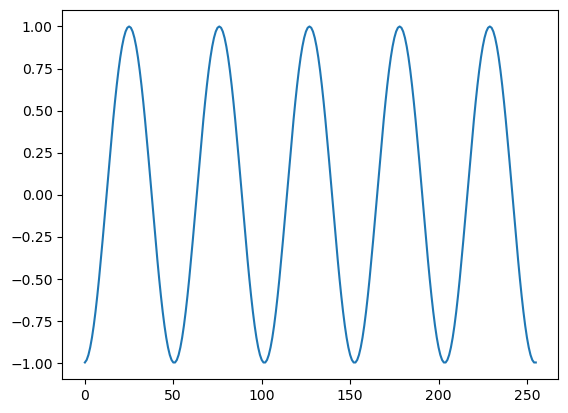

In [39]:
plt.plot(img_cos[128])

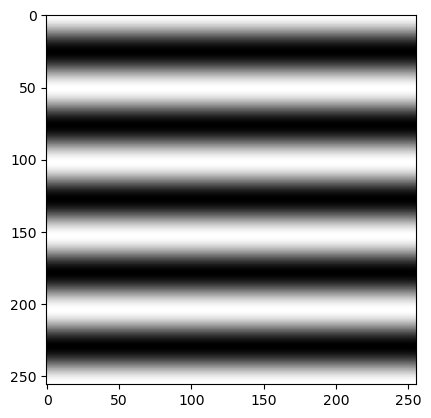

In [40]:
x = y = np.linspace(-128, 128, 256)
X, Y = np.meshgrid(x, y)
fx, fy = 0, 5
img_cos = np.cos(2*np.pi*(fx*X+fy*Y))
plt.imshow(img_cos, cmap='gray')

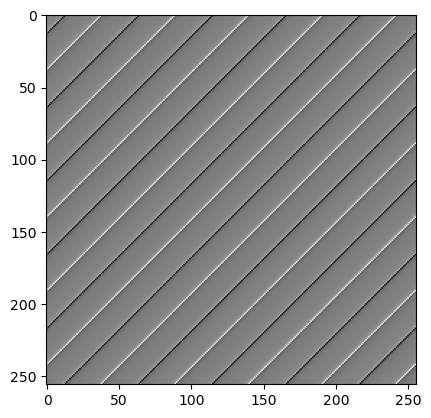

In [41]:
x = y = np.linspace(-128, 128, 256)
X, Y = np.meshgrid(x, y)
fx, fy = 5, 5
img_tan = np.tan(2*np.pi*(fx*X+fy*Y))
plt.imshow(img_tan, cmap='gray')

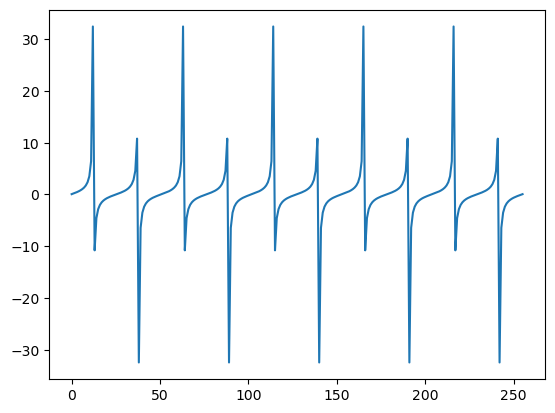

In [42]:
plt.plot(img_tan[128])

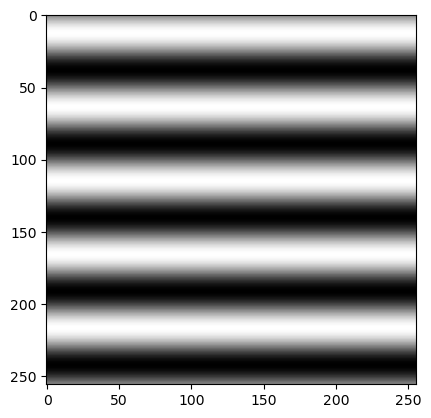

In [43]:
x = y = np.linspace(-128, 128, 256)
X, Y = np.meshgrid(x, y)
fx, fy = 0, 5 ### TRY CHANGING THIS
img_sin = np.sin(2*np.pi*(fx*X+fy*Y))
plt.imshow(img_sin, cmap='gray')

What is frequency in an image? Change in gray level.

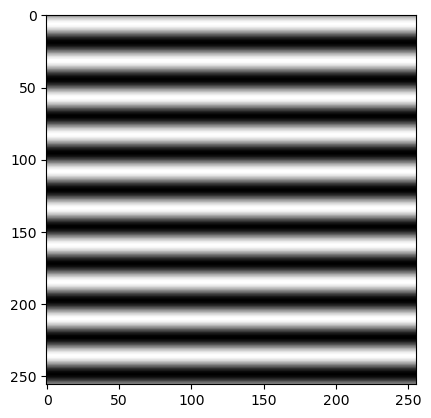

In [44]:
x = y = np.linspace(-128, 128, 256)
X, Y = np.meshgrid(x, y)
fx, fy = 0, 10 ### TRY CHANGING THIS
img_sin = np.sin(2*np.pi*(fx*X+fy*Y))
plt.imshow(img_sin, cmap='gray')

It's rapid now. Higher frequency than before.

**Objective**: FT of a sine ?

(<Axes: >, <matplotlib.image.AxesImage at 0x753680997f80>)

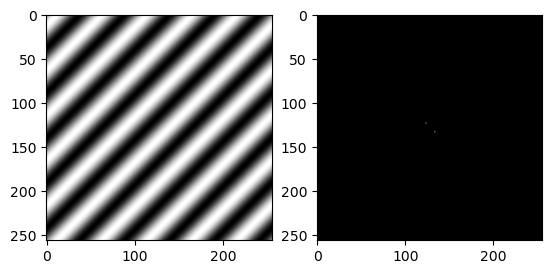

In [45]:
# Generate the image
x = y = np.linspace(-128, 128, 256)
X, Y = np.meshgrid(x, y)
fx, fy = 5, 5 ### TRY CHANGING THIS
img_sin = np.sin(2*np.pi*(fx*X+fy*Y))

# Obtain the FT of the input image. A movement from spatial domain to frequency domain
imgFT = np.fft.fft2(img_sin)
# print(imgFT.dtype) # complex128
imgFT = np.fft.fftshift(imgFT)

plt.subplot(1, 2, 1), plt.imshow(img_sin, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(np.abs(imgFT), cmap='gray')

(<Axes: >, <matplotlib.image.AxesImage at 0x7536800ed400>)

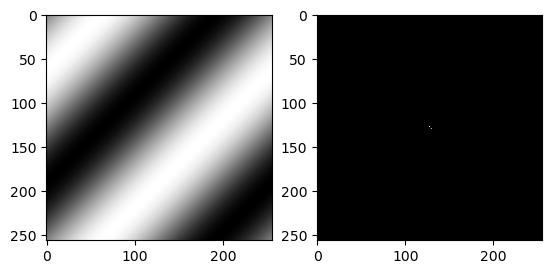

In [46]:
# Generate the image
x = y = np.linspace(-128, 128, 256)
X, Y = np.meshgrid(x, y)
fx, fy = 1, 1 ### CHANGING THIS MOVES THE DOTS!!!!!!!!!!!!!!
img_sin = np.sin(2*np.pi*(fx*X+fy*Y))

# Obtain the FT of the input image. A movement from spatial domain to frequency domain
imgFT = np.fft.fft2(img_sin)
# print(imgFT.dtype) # complex128
imgFT = np.fft.fftshift(imgFT)

plt.subplot(1, 2, 1), plt.imshow(img_sin, cmap='gray')
plt.subplot(1, 2, 2), plt.imshow(np.abs(imgFT), cmap='gray')